# Sampling Problem

Understanding a program's resilence characterisitc usually need to a lot of fault injection experiments to test the program's multiple region. However, the potential fault injection location are tremendous which is almost impossible test all of them. A reasonable sampling strategy, which get a small fraction of the data but get better understanding,  are necessary to develop. 

Previous experiment teach us, low mantissa bit have less impact compare to high mantissa bit and exponent bit. In this study, we propose a sampling strategy which extract small fraction of the sample from low mantissa bit and large fraction from the high mantissa and exponent bit. 

Our experiment shows that our sampling strategy have similar result with the grand truth. Compare to the random sampling, our method have low standard deviation.


1. what is the edge between high bit and low bit. 24/64
2. what's the percentage come from low bit, what's the percentage come from high bit


In [12]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

In [19]:
dataset = []
highbit_dataset = []
allline = set()

with open('fft_exhaust.csv') as f:
    lines = f.readlines()
outcomeindex = lines.pop(0).strip('\n\t ').split(',').index('outcome')
 

for line in lines:
    line = line.strip('\r\n').split(',')
    allline.add(line[2])
    dataset.append(line)

for d in dataset:
    if float(d[-1]) > 40:
        highbit_dataset.append(d)

#calculate the sdc ratio base on the given data set
def calculate_SDC_ratio(data, ratio = 1.0):
    dataset = {'Masked':0.0, 'SDC':0.0, 'DUE':0.0}
    for d in data:
        dataset[d[outcomeindex]] += 1 
    return dataset['SDC']/(dataset['SDC'] + dataset['Masked'] + dataset['DUE']) * ratio
    
def calculate_SDC_Impact(data):
    result = {}
    for d in data:
        if d[outcomeindex-1] != 'nan':
            if d[2] in result:
                result[d[2]].append(float(d[outcomeindex-1]))
            else:
                result[d[2]] = [float(d[outcomeindex-1])]
    
    for key in result:
        result[key] = np.log(np.mean(result[key]))
    
    return result

def calculate_SDC_ratio_local(data, ratio=1.0):
    lines = {}
    result = {}
    
    for d in data:
        if d[2] in lines:
            lines[d[2]][d[outcomeindex]] += 1
        else:
            lines[d[2]] = {'Masked':0.0, 'SDC':0.0, 'DUE':0.0}
    
    for key, value in lines.iteritems():
        count = lines[key]['Masked'] + lines[key]['SDC'] + lines[key]['DUE']
        if count == 0:
            result[key] = 0
        else:
            result[key] = lines[key]['SDC']/ count * ratio
        
    return result

def sampling(data, sample_size =1000):
    sample = []
    data_size = len(data)
    
    for i in range(sample_size):
        index = np.random.randint(data_size)
        sample.append(data[index])
    return sample

def sampling_high_bit(data, sample_size = 1000):
    sample = []
    data_size = len(data)
    
    for i in range(sample_size):
        index = np.random.randint(data_size)
        sample.append(data[index])
    return sample


sdc_global_exhaust = []
sdc_global_highbit = []

sdc_local_exhaust = {}
sdc_local_highbit = {}

sdc_impact_exhaust = {}
sdc_impact_highbit = {}

for line in allline:
    sdc_local_exhaust[line] = []
    sdc_local_highbit[line] = []
    sdc_impact_exhaust[line] = []
    sdc_impact_highbit[line] = []

for i in range(1000):
    sample_exhaust = sampling(dataset)
    sample_highbit = sampling(highbit_dataset)
    
    sdc_global_exhaust.append(calculate_SDC_ratio(sample_exhaust))
    sdc_global_highbit.append(calculate_SDC_ratio(sample_highbit, 24.0/64))
    
    #sdc local
    exhaust_item = calculate_SDC_ratio_local(sample_exhaust)
    highbit_item = calculate_SDC_ratio_local(sample_highbit, 24.0/64)
    
    for key in exhaust_item:
        sdc_local_exhaust[key].append(exhaust_item[key])
    for key in highbit_item:
        sdc_local_highbit[key].append(highbit_item[key])
    
    #sdc impact local
    exhaust_item = calculate_SDC_Impact(sample_exhaust)
    highbit_item = calculate_SDC_Impact(sample_highbit)

    for key in exhaust_item:
        sdc_impact_exhaust[key].append(exhaust_item[key])
    for key in highbit_item:
        sdc_impact_highbit[key].append(highbit_item[key])

print "Done"
#sample = sampling(dataset)
#print calculate_SDC_ratio(dataset)
#print calculate_SDC_ratio(sample)
#print calculate_SDC_Impact(sample)
#print calculate_SDC_ratio_local(sample)

Done


## Global SDC Ratio

In [20]:
print np.mean(sdc_global_exhaust)
print np.std(sdc_global_exhaust)

print np.mean(sdc_global_highbit)
print np.std(sdc_global_highbit)

0.069497
0.007949464824753928
0.069285
0.004665434063407178


# SDC local ratio

709    0.037984
710    0.020546
711    0.058689
712    0.059973
714    0.063081
715    0.066266
725    0.178672
726    0.174179
803    0.046230
804    0.045271
819    0.096872
820    0.099895
832    0.057892
833    0.058519
867    0.024514
868    0.011505
869    0.030729
870    0.031412
871    0.030286
872    0.028213
873    0.035092
874    0.035996
875    0.030911
876    0.031700
877    0.036328
878    0.038437
dtype: float64
709    0.012817
710    0.008736
711    0.021007
712    0.021856
714    0.022789
715    0.021213
725    0.016910
726    0.017201
803    0.013975
804    0.014437
819    0.025461
820    0.025233
832    0.019627
833    0.019472
867    0.008930
868    0.004701
869    0.010682
870    0.010836
871    0.010829
872    0.011177
873    0.011301
874    0.011702
875    0.010748
876    0.011003
877    0.012026
878    0.011676
dtype: float64


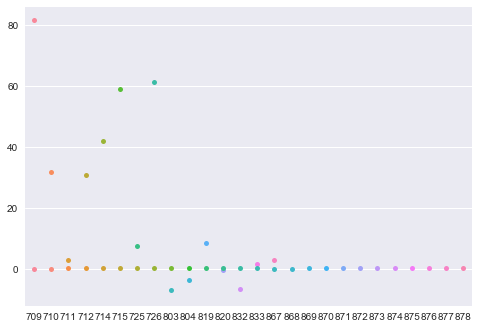

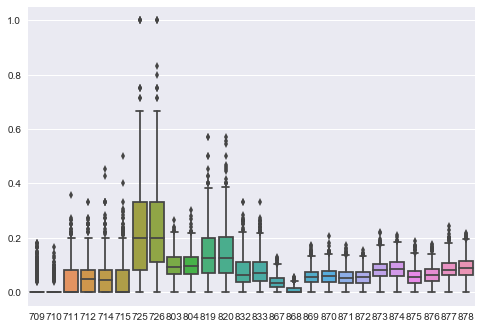

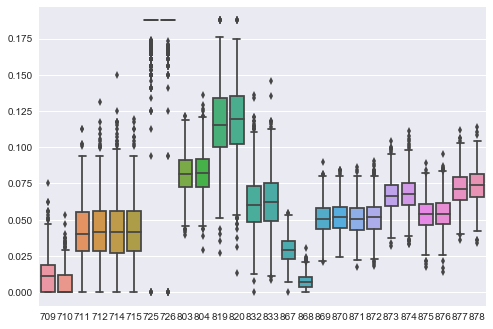

In [15]:
for key in sdc_local_exhaust:
    while len(sdc_local_exhaust[key]) < 1000:
        sdc_local_exhaust[key].append(0)
    while len(sdc_local_highbit[key]) < 1000:
        sdc_local_highbit[key].append(0)

exhaust = pd.DataFrame.from_dict(sdc_local_exhaust)
highbit = pd.DataFrame.from_dict(sdc_local_highbit)

grandtruth = calculate_SDC_ratio_local(dataset)
name = []
values = []

for key in sorted(grandtruth.iterkeys()):
    name.append(key)
    values.append(grandtruth[key])

print exhaust.std()
print highbit.std()
plt.close()
#plt.subplot(3, 1, 1)
sns.stripplot(name, values)
#plt.subplot(3, 1, 2)
plt.figure()
sns.boxplot(data=exhaust)
#plt.subplot(3, 1, 3)
plt.figure()
sns.boxplot(data=highbit)
#print sdc_local.keys()
#print sdc
#sns.boxplot(sdc_local.keys(), sdc_local.values())
plt.show()


# SDC Impact

/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:1977: RuntimeWarning: invalid value encountered in double_scalars
  notch_min = med - 1.57 * iqr / np.sqrt(N)


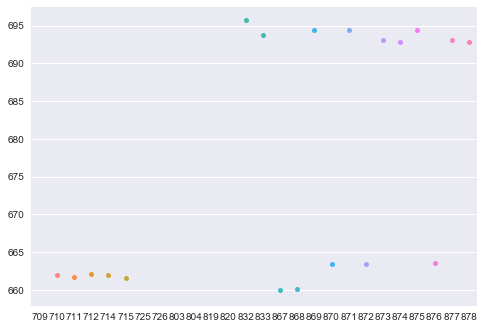

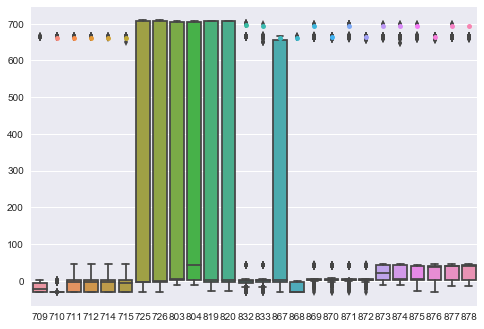

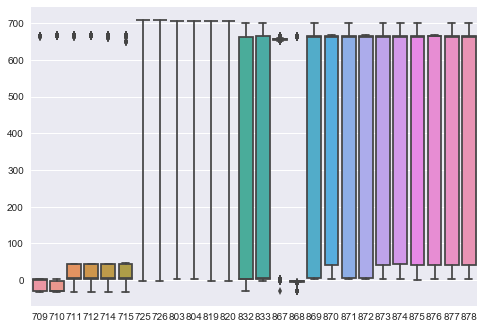

In [17]:
#print sdc_impact

for key in sdc_impact_exhaust:
    while len(sdc_impact_exhaust[key]) < 1000:
        sdc_impact_exhaust[key].append(0)
    while len(sdc_impact_highbit[key]) < 1000:
        sdc_impact_highbit[key].append(0)
        
exhaust = pd.DataFrame.from_dict(sdc_impact_exhaust)
highbit = pd.DataFrame.from_dict(sdc_impact_highbit)

grandtruth = calculate_SDC_Impact(dataset)
name = []
values = []
for k in sorted(grandtruth.iterkeys()):
    name.append(k)
    values.append(grandtruth[k])
sns.stripplot(name, values)

#plt.figure()
#dataframe = pd.DataFrame.from_dict(sdc_impact)
#plt.figure()
sns.boxplot(data=exhaust)
#plt.subplot(3, 1, 3)
plt.figure()
sns.boxplot(data=highbit)
plt.show()
